In [64]:
import glob

dataset_dir = '/home/himoza/Учеба/Praktik/luna16'
mhd_list = glob.glob(dataset_dir + '/subset*/subset*/*.mhd')

In [ ]:
len(mhd_list)

445

: 

In [ ]:
import os

presentOnDisk_set = {os.path.split(p)[-1][:-4] for p in mhd_list}

: 

In [ ]:
len(presentOnDisk_set)

445

: 

In [ ]:
import csv

annotationCenter_xyz = ''

with open(dataset_dir + '/annotations.csv', 'r') as f:
    row = list(csv.reader(f))[1]
    series_uid = row[0]
    annotationCenter_xyz = tuple(float(x) for x in row[1:4])

annotationCenter_xyz

(-128.6994211, -175.3192718, -298.3875064)

: 

In [ ]:
diameter_dict = {}
with open(dataset_dir + '/annotations.csv', 'r') as f:
    for row in list(csv.reader(f))[1:]:
        series_uid = row[0]
        annotationCenter_xyz = tuple(float(x) for x in row[1:4])
        annotationDiameter_mm = float(row[4])
        
        diameter_dict.setdefault(series_uid, []).append(
            (annotationCenter_xyz, annotationDiameter_mm)
        )

: 

In [ ]:
for key in diameter_dict.keys():
    if len(diameter_dict[key]) > 1:
        print(key)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949
1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306
1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059
1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028
1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962
1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800
1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437
1.3.6.1.4.1.14519.5.2.1.6279.6001.113679818447732724990336702075
1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343
1.3.6.1.4.1.14519.5.2.1.6279.6001.114249388265341701207347458535
1.3.6.1.4.1.14519.5.2.1.6279.6001.114914167428485563471327801935
1.3.6.1.4.1.14519.5.2.1.6279.6001.117040183261056772902616195387
1.3.6.1.4.1.14519.5.2.1.6279.6001.118140393257625250121502185026
1.3.6.1.4.1.14519.5.2.1.6

: 

In [ ]:
from collections import namedtuple

CandidateInfoTuple = namedtuple(
    'CandidateInfoTuple',
    'isNodule_bool, diameter_mm, series_uid, center_xyz',
)

: 

In [ ]:
import functools

@functools.lru_cache(1)
def getCandidateInfoList(requireOnDisk_bool=True):
    dataset_dir = '/home/himoza/Учеба/Praktik/luna16'
    mhd_list = glob.glob(dataset_dir + '/subset*/subset*/*.mhd')
    presentOnDisk_set = {os.path.split(p)[-1][:-4] for p in mhd_list}

    diameter_dict = {}
    with open(dataset_dir + '/annotations.csv', 'r') as f:
        for row in list(csv.reader(f))[1:]:
            series_uid = row[0]
            annotationCenter_xyz = tuple(float(x) for x in row[1:4])
            annotationDiameter_mm = float(row[4])

            diameter_dict.setdefault(series_uid, []).append(
                (annotationCenter_xyz, annotationDiameter_mm)
            )

    candidateInfo_list = []
    with open(dataset_dir + '/candidates.csv', 'r') as f:
        for row in list(csv.reader(f))[1:]:
            series_uid = row[0]

            if series_uid not in presentOnDisk_set and requireOnDisk_bool:
                continue

            isNodule_bool = bool(int(row[4]))
            candidateCenter_xyz = tuple(float(x) for x in row[1:4])
            candidateDiameter_mm = 0
            for annotation_tup in diameter_dict.get(series_uid, []):
                annotationCenter_xyz, annotationDiameter_mm = annotation_tup
                for i in range(3):
                    delta_mm = abs(candidateCenter_xyz[i] - annotationCenter_xyz[i])
                    if delta_mm > annotationDiameter_mm:
                        break
                else:
                    candidateDiameter_mm = annotationDiameter_mm
                    break
            candidateInfo_list.append(CandidateInfoTuple(
                isNodule_bool,
                candidateDiameter_mm,
                series_uid,
                candidateCenter_xyz
            ))
    return candidateInfo_list

: 

In [ ]:
count = 0

for i in getCandidateInfoList():
    if i.series_uid == '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405' and i.isNodule_bool:
        print(i)

CandidateInfoTuple(isNodule_bool=True, diameter_mm=16.38127631, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(89.32, 190.84, -516.82))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.20857028, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(94.93, 153.03, -429.91))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.54514997, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(8.8, 174.74, -401.87))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=16.38127631, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(88.87249423, 197.6836731, -514.3939557))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.54514997, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(2.019565949, 172.5930677, -405.0528932))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=8.143261683, series

: 

In [ ]:
diameter_dict['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405']

[((-24.0138242, 192.1024053, -391.0812764), 8.143261683),
 ((2.441546798, 172.4648812, -405.4937318), 18.54514997),
 ((90.93171321, 149.0272657, -426.5447146), 18.20857028),
 ((89.54076865, 196.4051593, -515.0733216), 16.38127631)]

: 

In [ ]:
for i in presentOnDisk_set:
    if '100225287222365663678666836860' in i:
        print(1)

: 

In [ ]:
'1234'[-4:]

'1234'

: 

In [ ]:
import SimpleITK as sitk
import numpy as np

: 

In [ ]:
DATASET_DIR = '/home/himoza/Учеба/Praktik/luna16'

: 

In [ ]:
mhd_path = glob.glob(
            DATASET_DIR + f'/subset*/subset*/{series_uid}.mhd'
        )

: 

In [ ]:
np_scan = np.array(sitk.GetArrayFromImage(sitk.ReadImage(mhd_path[0])))
np_scan.shape

(321, 512, 512)

: 

In [ ]:
import matplotlib.pyplot as plt

: 

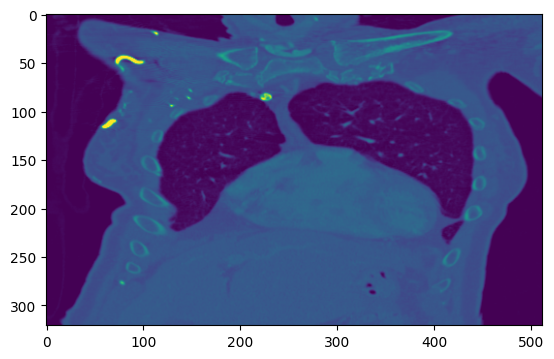

: 

In [ ]:
plt.imshow(np_scan[::-1,190,:], colorizer='gray')

In [ ]:
np_scan[150,:,:]

array([[ -985,  -989,  -986, ..., -1000,  -984,  -987],
       [-1000,  -993,  -979, ...,  -999,  -984,  -990],
       [-1000, -1000,  -994, ...,  -991,  -983,  -990],
       ...,
       [ -983,  -960,  -949, ...,  -950,  -945,  -934],
       [ -973,  -970,  -981, ...,  -941,  -943,  -929],
       [ -965,  -955,  -975, ...,  -947,  -929,  -915]],
      shape=(512, 512), dtype=int16)

: 

In [ ]:
ct_mhd = sitk.ReadImage(mhd_path[0])

: 

In [ ]:
ct_mhd.GetOrigin()

(-120.049467, 9.48041606, -657.0)

: 

In [ ]:
ct_mhd.GetSpacing()

(0.556640625, 0.556640625, 1.0)

: 

In [ ]:
ct_mhd.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

: 

In [ ]:
[1, 2, 3, 4, 5, 6, 7, 8, 9][slice(0, 5)]

[1, 2, 3, 4, 5]

: 

In [ ]:
import torch

: 

In [ ]:
torch.cuda.is_available()

True

: 

In [ ]:
import gzip

from cassandra.cqltypes import BytesType
from diskcache import FanoutCache, Disk
from io import BytesIO
from diskcache.core import MODE_BINARY

: 

In [118]:
from src.data.dataset import getCandidateInfoList, getCt, LunaDataset

In [119]:
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=True)
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

In [ ]:
for i in range(0, len(diameter_list), 100):
    print(f'{i:4} {diameter_list[i]:4.1f} mm')

   0 32.3 mm
 100 17.7 mm
 200 13.0 mm
 300 10.0 mm
 400  8.2 mm
 500  7.0 mm
 600  6.3 mm
 700  5.7 mm
 800  5.1 mm
 900  4.7 mm
1000  4.0 mm
1100  0.0 mm
1200  0.0 mm
1300  0.0 mm


: 

: 

: 

In [ ]:
data = LunaDataset(10, False)

: 

: 

: 

In [120]:
%matplotlib inline

In [121]:
from vis import findPositiveSamples, showCandidate

In [122]:
noduleSample_list = findPositiveSamples()

0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.07544345, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.481278873893653517789960724156', center_xyz=(-102.571208, -5.186558766, -205.1033412))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(63.4740118048, 73.9174523314, -213.736128767))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=24.77327957, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.146987333806092287055399155268', center_xyz=(97.3540746077, -16.7922286632, -263.6599083

In [134]:
series_uid = positiveInfo_list[3][2]

In [135]:
series_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273'

IndexError: index 16 is out of bounds for axis 0 with size 16

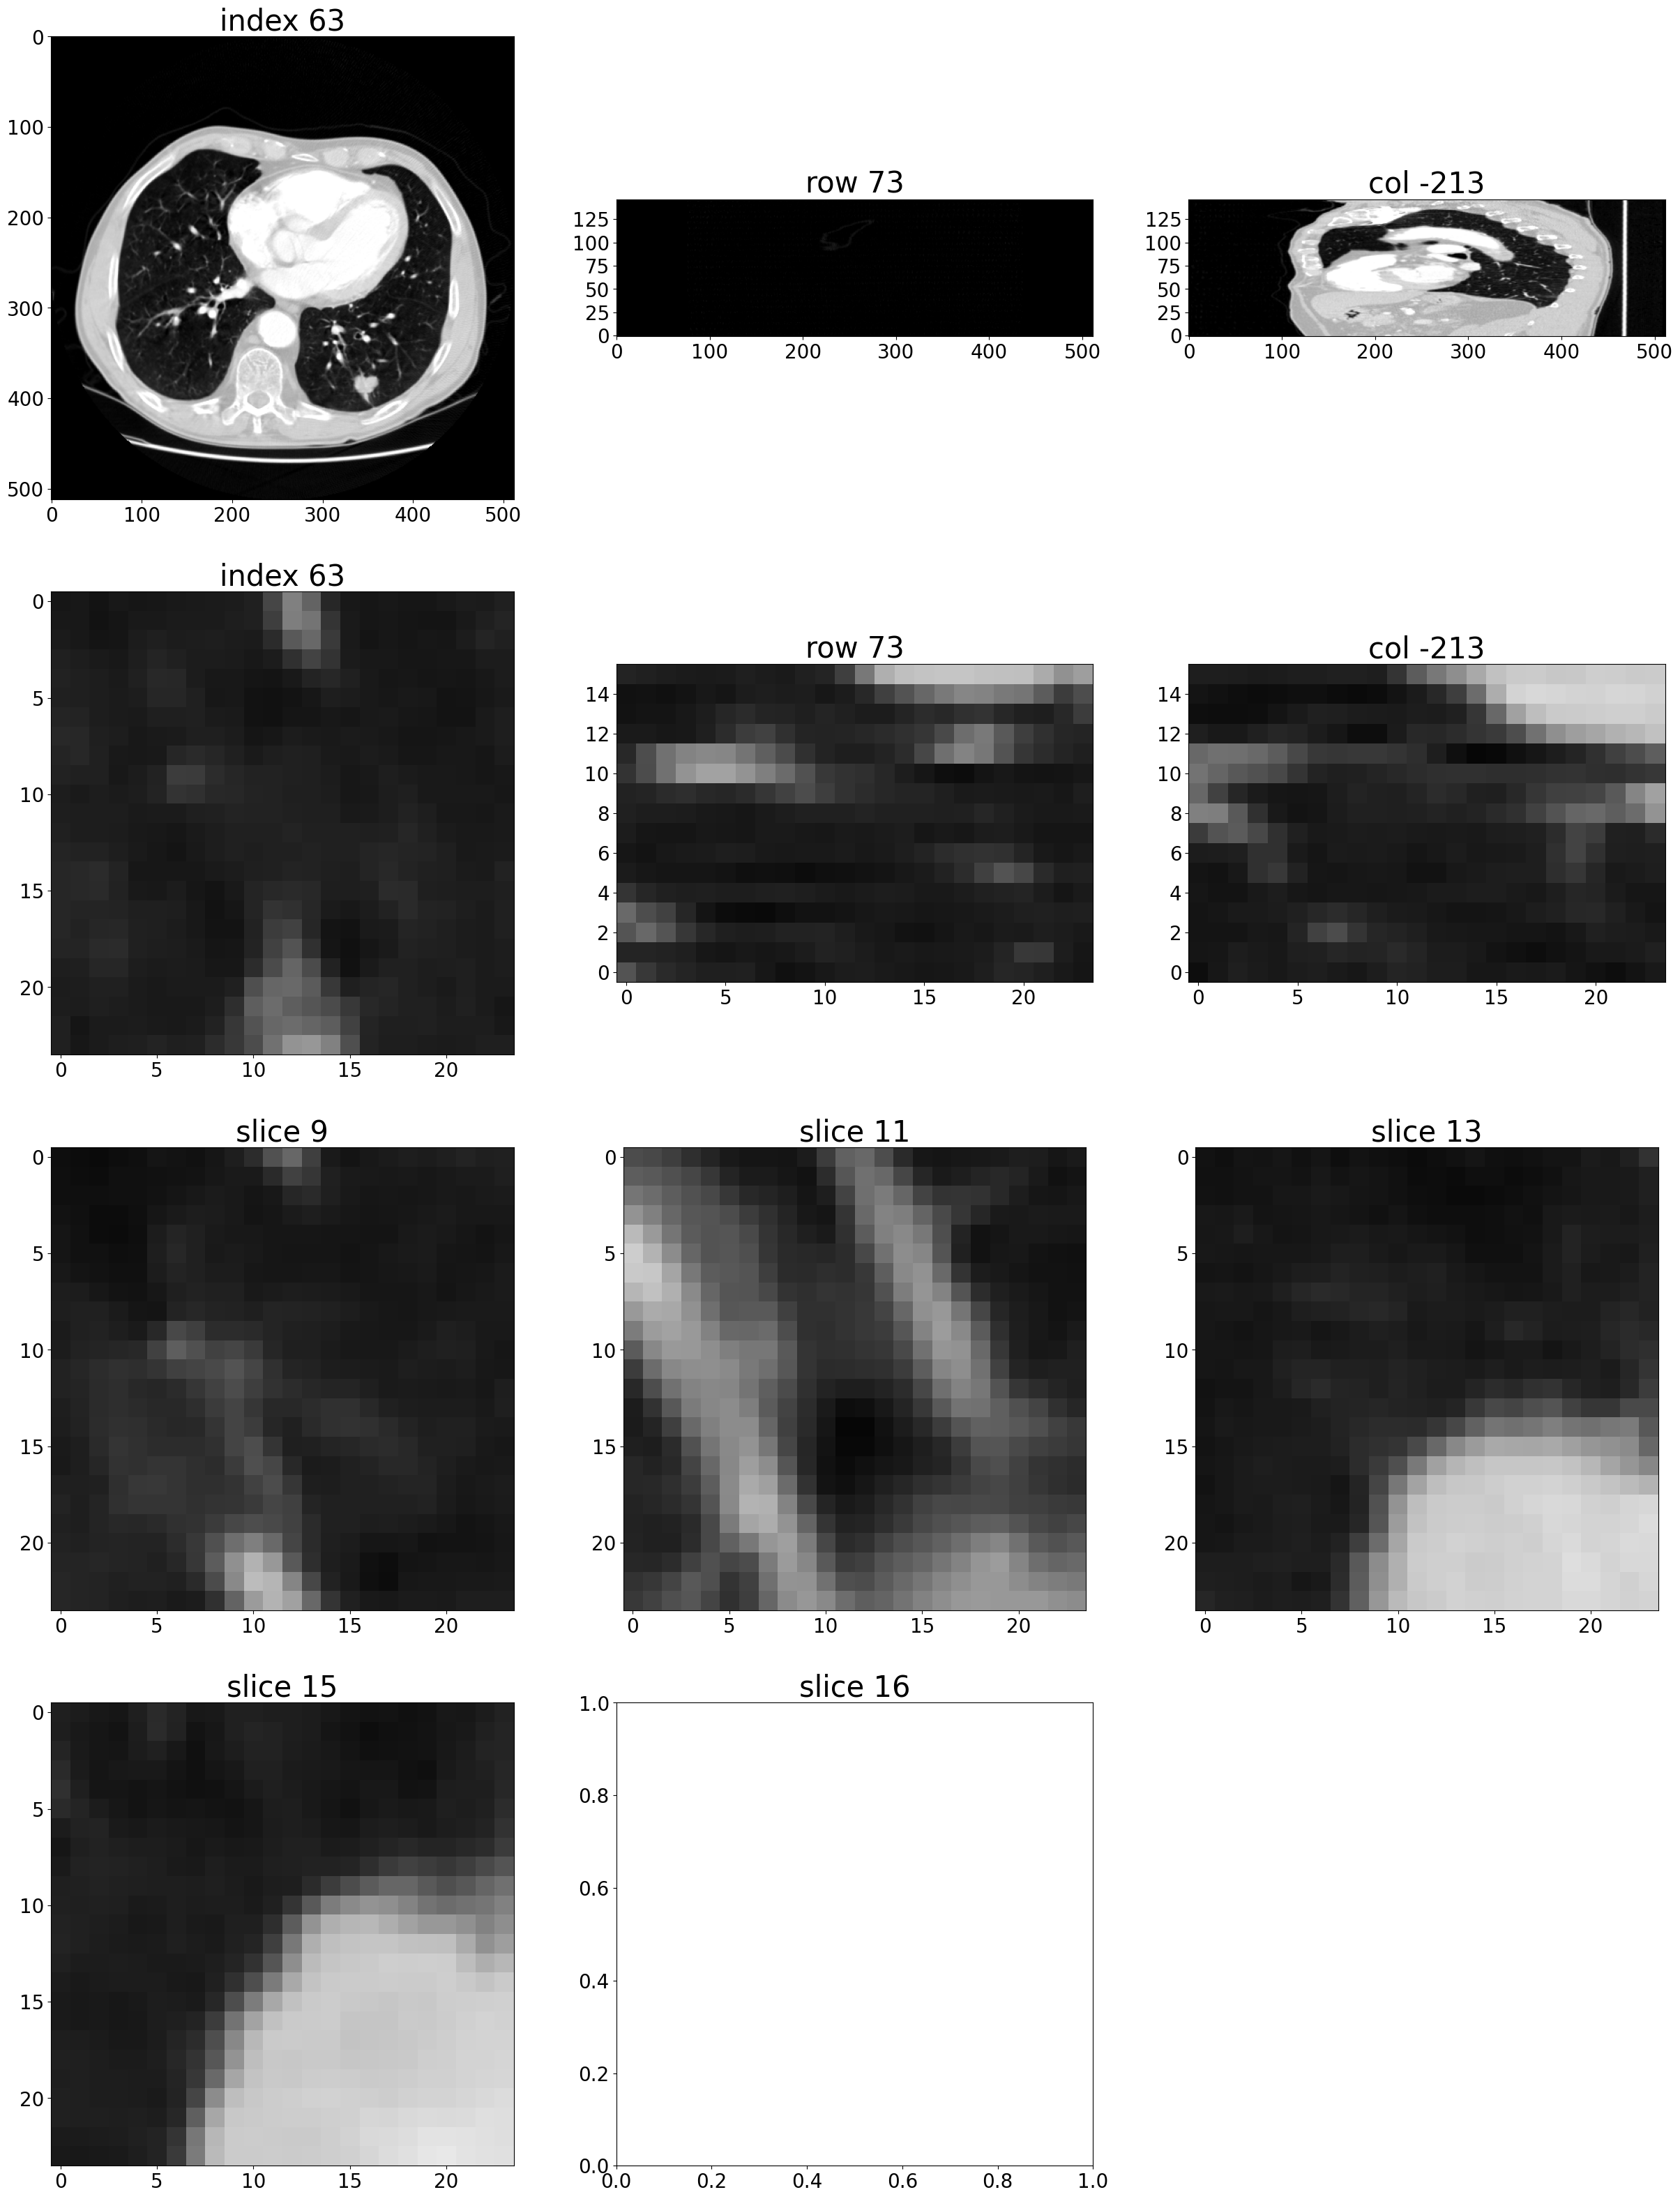

In [136]:
showCandidate(series_uid=series_uid)

In [65]:
DATASET_DIR = '/home/himoza/Учеба/Praktik/luna16'

In [67]:
mhd_path = glob.glob(
      DATASET_DIR + f'/subset*/subset*/{series_uid}.mhd'
  )

In [68]:
mhd_path

[]

In [76]:
series_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.183982839679953938397312236359'